In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


In [2]:
data = pd.read_csv('Data/cleaned_data.csv', index_col = 'Unnamed: 0')

In [3]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,new_genre_hip hop,new_genre_indie,new_genre_jazz,new_genre_metal,new_genre_pop,new_genre_rap,new_genre_rock,new_genre_soul,new_genre_trance,energy_loudness
0,0.372240,-0.468348,0.116791,-0.559858,-0.666763,0.487650,-0.615265,1.052563,-0.135077,-0.568447,...,0,0,0,0,0,0,0,0,0,0.344461
1,1.060428,-0.629133,0.244546,-0.445405,-0.454801,0.699573,0.057137,0.756501,-0.588119,-0.930391,...,0,0,0,0,0,0,0,0,0,-0.025449
2,1.044875,-1.158739,0.507793,-0.895058,-0.623914,0.769216,-0.758285,0.237899,-1.637212,-0.582458,...,0,0,0,0,0,0,0,0,0,0.678709
3,1.118778,-0.723536,0.090359,-1.047643,-0.477436,0.437785,-0.831672,0.280016,-1.175705,-0.512976,...,0,0,0,0,0,0,0,0,0,0.871295
4,0.143436,-0.485108,0.138059,-0.140697,-0.669335,-0.092471,0.138538,0.058389,0.220791,-0.066867,...,0,0,0,0,0,0,0,0,0,-0.019492


In [4]:
#plotting feature importance

x_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'mode']
y = data['popularity_labels']
y = label_binarize(y, classes = [1,2,3])
n_classes = y.shape[1]
X = data[x_cols]

clf = OneVsRestClassifier(LogisticRegression(multi_class='ovr', solver='saga', penalty = 'l1', C = 1.6, max_iter = 700))
clf.fit(X, y)
# look at feature importance
importance = clf.coef_[0]

importance_dict = dict()
for i,v in zip(x_cols,importance):
    print('Feature: {}, Score: {}'.format(i,v))
    importance_dict.update({i:v})

Feature: acousticness, Score: 0.967424244960571
Feature: danceability, Score: 0.2181121406182885
Feature: duration_ms, Score: 0.02522975975411266
Feature: energy, Score: 0.17282890547565738
Feature: instrumentalness, Score: 0.7898173203872585
Feature: liveness, Score: 0.3104220140535019
Feature: loudness, Score: 0.4215506594390789
Feature: speechiness, Score: 0.18855345803811752
Feature: tempo, Score: 0.08067401937405577
Feature: valence, Score: -0.2958601315070084
Feature: mode, Score: -0.13001815006457962


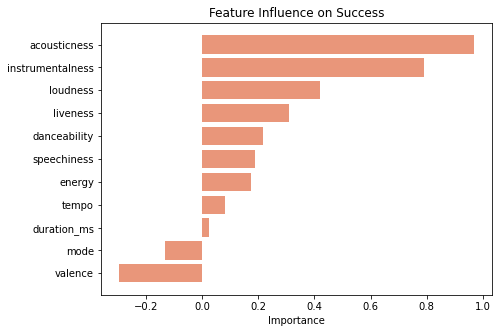

In [5]:
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}

#plot feature importance
fig = plt.figure(figsize = (7,5))
plt.barh(*zip(*sorted_dict.items()),color = 'darksalmon')
plt.title('Feature Influence on Success')
plt.xlabel('Importance')
plt.show()

In [6]:
data['popularity_labels'].replace(1, value = 'Unsuccessful', inplace = True)
data['popularity_labels'].replace(2, value = 'Successful', inplace = True)
data['popularity_labels'].replace(3, value = 'Very Successful', inplace = True)

#data['popularity_labels']

<Figure size 360x288 with 0 Axes>

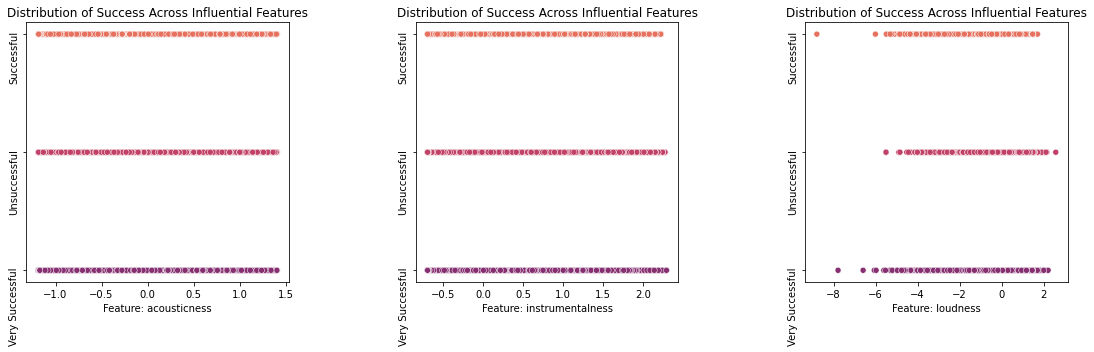

In [7]:
#Would like to show how integrated all the classes are across most influential features 
fig = plt.figure(figsize=(5,4))

inf = ['acousticness', 'instrumentalness', 'loudness']
a = 1  # rows
b = 3  # columns
c = 1  # counter

fig, axes = plt.subplots(figsize = (15,5))

for i, feat in enumerate(inf):
    plt.subplot(a, b, c)
    sns.scatterplot(data = data, x = feat, y = 'popularity_labels', hue = 'popularity_labels', 
                    legend = False, palette = "flare");
    plt.tight_layout()
    plt.ylabel('');
    plt.yticks(rotation = 90)
    plt.xlabel('Feature: {}'.format(feat));
    plt.title('Distribution of Success Across Influential Features')
    c = c + 1


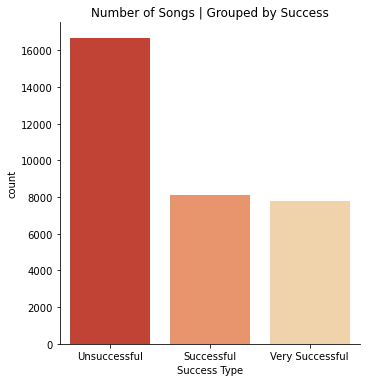

In [8]:
sns.catplot(data = data, x = 'popularity_labels', kind = 'count', 
            palette = 'OrRd_r', order = ['Unsuccessful', 'Successful', 'Very Successful']);
plt.title('Number of Songs | Grouped by Success');
plt.xlabel('Success Type');